In [11]:
import os
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Function

In [4]:
def get_sddata_from_dataframes(path_to_df, fext='.pkl',exclude_str=False):
    
    files = glob.glob(os.path.join(path_to_df,f'*{fext}'))
    
    if exclude_str:
        data_df = pd.concat([pd.read_pickle(fp) for fp in files if exclude_str not in fp],
                            ignore_index=True)
    else:
        data_df = pd.concat([pd.read_pickle(fp) for fp in files], ignore_index=True)
    
    #1) convert dataframe columns to numeric
    COLS_TO_CONVERT = ['sf', 'SO_sec', 'seizureinvaded', 'SO_index', 'sdinvaded_ch',
                     'sdonset_sec', 'sdend_sec', 'sdinvaded_region', 'seizuretermination_sec']
    
    for col in COLS_TO_CONVERT:
        data_df[col] = pd.to_numeric(data_df[col], errors='coerce')
    
    #2) filter data by seizure and SD invaded
    szinvaded_index = data_df.index[data_df['seizureinvaded']==1]
    sdinvaded_index = data_df.index[(data_df['seizureinvaded']==1)&(data_df['sdinvaded_region']==1)]
    nonsdinvaded_index = data_df.index[(data_df['seizureinvaded']==1)&(data_df['sdinvaded_region']==0)]
    return data_df, szinvaded_index, sdinvaded_index, nonsdinvaded_index

# Get data

In [13]:
dpath = '/media/Seizures/Wenzel/dataframes_patpool/'
data_df, szinv, sdinv, nonsdinv = get_sddata_from_dataframes(dpath, exclude_str='100')
invaded_df = data_df.loc[szinv]

In [46]:
data_df[(data_df['pnr']=='074')&(data_df['sdinvaded_region']==1)]

,pnr,sznr,datapath,chname,region,hemisphere,sf,SO_sec,fname,seizureinvaded,SO_index,sdinvaded_ch,sdonset_sec,sdend_sec,sdinvaded_region,seizuretermination_sec
72,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RA1,RA,R,1000,1825,CSC41.ncs,1.0,1800000.0,1.0,2131.0,2141.0,1.0,NaN
73,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RA2,RA,R,1000,1825,CSC42.ncs,1.0,1800000.0,NaN,NaN,2141.0,1.0,NaN
74,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RA3,RA,R,1000,1825,CSC43.ncs,1.0,1800000.0,1.0,2131.0,2141.0,1.0,NaN
75,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RA4,RA,R,1000,1825,CSC44.ncs,1.0,1800000.0,1.0,2131.0,2141.0,1.0,NaN
76,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RA5,RA,R,1000,1825,CSC45.ncs,1.0,1800000.0,1.0,2131.0,2141.0,1.0,NaN
77,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RA6,RA,R,1000,1825,CSC46.ncs,1.0,1800000.0,1.0,2131.0,2141.0,1.0,NaN
78,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RA7,RA,R,1000,1825,CSC47.ncs,1.0,1800000.0,1.0,2131.0,2141.0,1.0,NaN
79,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RA8,RA,R,1000,1825,CSC48.ncs,1.0,1800000.0,1.0,2131.0,2141.0,1.0,NaN
80,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RAH1,RAH,R,1000,1826,CSC49.ncs,1.0,1800000.0,1.0,2131.0,2141.0,1.0,NaN
81,074,03,/media/Seizures/60min_cut/074/2019-06-29_10-52...,RAH2,RAH,R,1000,1826,CSC50.ncs,1.0,1800000.0,NaN,NaN,2141.0,1.0,NaN


_____

# Some quick statistics

### Percentage of regions with SD

In [10]:
(len(data_df.loc[sdinv])/8)*100/(len(data_df.loc[szinv])/8)

21.73913043478261

### Names of seizure-invaded AND SD-invaded regions 

In [45]:
invaded_regions = np.unique(invaded_df['region']).tolist()
sd_invaded_regions = np.unique(data_df.loc[sdinv]['region']).tolist()
print('seizure invaded regions:', invaded_regions)
print('SD invaded regions:', sd_invaded_regions)

seizure invaded regions: ['LA', 'LAH', 'LEC', 'LMH', 'LPHC', 'LPIC', 'LTa', 'LTb', 'RA', 'RAH', 'REC', 'RPHC', 'RTa', 'RTc']
SD invaded regions: ['LA', 'LAH', 'RA', 'RAH']


### SD vs. Non SD, region-wise

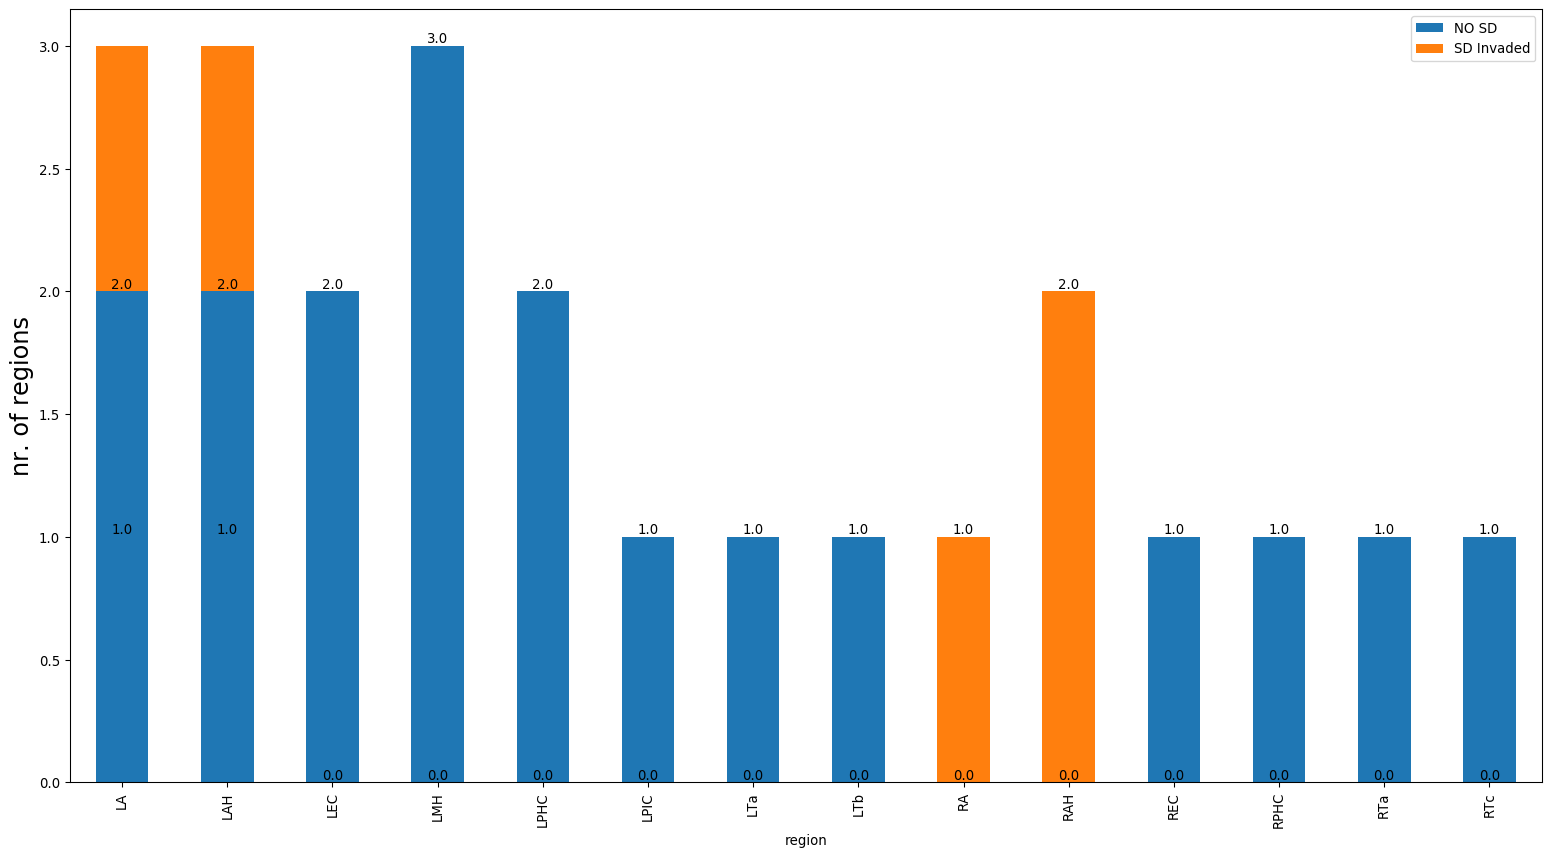

In [44]:
my_dpi = 96
fig, ax = plt.subplots(figsize=(1900/my_dpi, 1024/my_dpi), dpi=my_dpi)
percentage_df = invaded_df['sdinvaded_region'].fillna(0).groupby(invaded_df['region']).value_counts().unstack().fillna(0)/8


bars = percentage_df.plot(kind='bar', stacked=True, ax=ax)

#set label
custom_labels = ['NO SD', 'SD Invaded']
bars.legend(custom_labels)

# Set x-axis labels
group_labels = percentage_df.index
ax.set_xticks(range(len(group_labels)))
ax.set_xticklabels(group_labels)


for bar in bars.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

ax.set_ylabel('nr. of regions', fontsize=18)
#plt.savefig(os.path.join(savepath, 'nr_sd_occurance_region.eps'), format='eps')
plt.show()